# Stochastic Gradient Hamiltonian Monte Carlo

Paul-Emile LANDRIN, William PALMER

**1) Problem statement**

The paper *Stochastic Gradient Hamiltonian Monte Carlo* proposes a method to sample accuratly from a posterior distribution with a large number of observations. The method is similar to the Hamiltonian Monte Carlo (HMC), which we studied in course. The main difference is that to compute the gradient of the posterior only a minibatch of the whole dataset is used.

**2) Context/scope**

At the time of Big Data, it is important to develop highly scalable methods. This paper proposes a stochastic approach to sample accurately from a posterior using only batches of the whole dataset. This method enables to scale to large datasets where it is costly to go through all the data. It also offers the opportunity to operate online, i.e. where new data appears on a real time basis.


**3) Existing work**

Stochastic gradient alogrithms are wideley used in optimization problems and have prove to perform well. Another stochastic algorithm called Stochastic Gradient Langevin Dynamics [2] exists to sample from a posterior. The idea behind this algorithm is similar to the Hamiltonian Gradient Descent in the sense that it uses the dynamic of particles to draw samples. There are two main differences with the HMC algorithm. First this particle follows the first order equation of Langevin dynamics, so no momentum is introduced in this algorithm. Secondly, the gradient used in the update is calculated from only a minibatch of all the observations. The paper [2] proposes also a scheme to control the learning rate used in the update formula. The learning rates are required to be square summable, hence they tend to zero. So we can understand, that this shrinking learning rates can cause practical issues. For instance, after a long time, the proposed samples will be really closed to each other, and they would likely be stuck near a local maxima. 

The publication [3] is an independant evaluation of SGLD algorithms. They pretend that one of the biggest drawbacks of this algorithm is that it converges slowly to the required distribution.



**4) Contribution**

The paper *Stochastic Gradient Hamiltonian Monte Carlo* offers an alternative to the SGLD algorithm. The SGHMC combines attributes from a stochastic algorithms with the momentum term of HMC. In this paper, the authors proves that the SGHMC algorithm requires a friction term in the dynamics equation to converge. They also demonstrate that given their hypothesis on the noise of the stochastic gradients their algorithm does sample from the right distribution. Finally the authors study how to implement the algorithm in practice where the hypothesis they made about the noisy gradients doesn't necessarily hold. They have compared the performances of their tune algorithm notably with that of the SGLD algorithm on two simulations.

**5) Technical content (high level)**

SGHMC is similar to the HMC algorithm. We are looking to sample from the posterior distribution of a parameter $\theta$. We introduce the same Hamiltonian mapping function as in HMC. This time the momentum is updated with an estimation of the gradient over a minibatch of all the observations. This study proposes to model the stochastic gradient as the true gradient plus some white noise. To ensure the convergence of the samples a friction term needs to be added. This term is proportionnal to the variance of the white noise time the momentum and it counters the effect of these pertubations. Such model with the friction term is actually a second order Langevin dynamics equation.

Contrary to the HMC algorithm we studied in class, the SGHMC cannot use a Metropolis Hastings scheme to reject wrong samples. Indeed the MH step would require to evaluate the current probabilities distribution using the whole dataset. By doing so we would lose the advantages of a stochastic algorithm. Therefore the updates of the parameter $\theta$ and the momentum need to be very accurate.

**6) Technical content (details)** 


    a) SGHMC in theory

        i) Notations

The goal is to sample from the posterior distribution $p(\theta /D)$ of some parameter $\theta$ where $D$ is the whole dataset.

Let's call $U$ the potential energy function, similar as the one we used for the HMC sampler. $U$ depends of the dataset $D$. We have $p(\theta /D) \propto exp(-U(\theta))$.

Let's $r$ be the momentum, $M$ the mass of the particle as used in the HMC algorithm.

Let's $\epsilon$ be the learning rate, used to update the momentum.



        ii) Hypothesis on the distribution of mini-batch gradient
        
The research paper make the supposition that the minibatch gradient $\nabla \hat{U}$ is equal to the true gradient plus some white noise:  $\nabla \hat{U}(\theta) = \nabla U(\theta) + N(0, V(\theta))$, where V is the covariance of the stochastic gradient noise.


        iii) Second order Langevin Dynamics

The equation of the position and the momentum update are the same as that of HMC, except that in the update of the momentum we use the stochastic gradient and add a friction term. These equations correspond to second order Langevin Dynamics.

The update is given by the following equations:

$$\Delta \theta =M^{-1}r $$
$$\Delta r= -\epsilon(\nabla \hat{U} -VM^{-1}r)$$

The second term is a friction term proportionnal to $V$ the variance of the minibatch gradients.

The article gives some elements of proof that these equations yield the right distribution. However, the proof is not exhaustive and relies on Fokker-Planck equations for distributions which are out of our scope.

    b) Stochastic gradient in practice
    
        i) Estimation of the variance of the stochastic gradients
        
The variance $V(\theta)$ of the stochastics gradients is unknown. So we can use the empirical Fischer information to evaluate it. It consists of approximating the variance of minibatch gradients by taking the variance of all the samples used in the minibatch.


        ii) User specified friction term

In practice, the noise variance $V$ is not known. The paper suppose that we can have an estimation $\hat{V}$ with for example the previous method. Then we replace the dynamics equation by the following using another friction term $C>V$ (this can be a positive matrix inequality):

$$\Delta \theta =M^{-1}r$$
$$\Delta r= -\epsilon(\nabla \hat{U} -CM^{-1}r + N(0, (C-\hat{V})))$$

This time the friction is proportionnal to C. If $\hat(V)=V$, then we have:

$$\nabla \hat{U} + N(0, (C-\hat{V})) = \nabla U + N(0, C) = \nabla U' $$

Hence the dynamics equation stands with some $U'$ equal to $U$ with an added white noise of variance $C$. With this $U'$ the proof of convergence holds. This bigger friction term helps to counter the approximation made by estimating $V$.

**7) Experiments**

Three experiments were conducted in this project. The scientists aim to compare their algorithm to SGLD and other classical methods.

    A) Simulated scenarios

This first experiment is quite simple and aims at comparing the performances of the different algorithms on a simple distribution (e.g. a multigaussian distribution). This problem is not stochastic. First the scientists observe that HMC is working very well without a MH update and with rather small values of learning rates. This is their control experiment. Then they add some noise to the gradient to simulate stochasticity. They observe that the HMC algorithm without MH does not sample from the right distribution. HMC with MH is sampling right but has a lower accepting rate. SGHMC and SGLD are both sampling right on this distribution when the learning rate is chosen properly. SGMHC is working well on a larger scale of learning rate than SGLD. Hence, these observations justify the interest to use SGHMC in comparison with the other algorithms.

Then the authors continued this comparison on two real life stochastic applications.

    B) BNN for classification
    
In this problem, the authors tackle the MNIST problems, where the goal is to recognize hand written numbers. They took a full Bayesian approach and used a neural network with two hidden layers. They tested four methods: SGD, SGD with momentum, SGLD and SGHMC to obtain the distribution of the parameters of the network. They do mention, that they choose the regularization parameters with cross validation, but the article is not clear wether these parameters are the same for each method. They made the observations that SGHMC was performing better than the two other methods (has a higher accuracy) no matter the number of iterations (epochs). SGHMC is also converging to a low test error more rapidly than SGLD.
    
    C) Online Bayesian Probabilistic Matrix Factorization for Movie Recommendations

This final experiment aims to test the performances of SGHMC on a problem involving sparsity. They use the application on collaborative filtering: given some film ratings the algorithms has to predict user preferences. They used a sparse dataset (4,000 movies, 6,000 users and 1,000,000 ratings). Given the numbers, the sparsity nature of this dataset could be question (they have 4% of all the possible ratings). They observe that SGHMC and SGLD are performing far better than the two optimization-based methods (SGD and SGD with momemtum) in term of accuracy and running time. However there were no obvious differences between the performances of the two algorithms.

**8) Evaluation**

    A) Do you think the work is technically sound? 

This method is interesting because it is very intuitive (we add friction to counter noise). However the technical side of this paper is questionnable. The convergence of this algorithm is not rigorously proven even under the assumptions made. Only elements of proofs that rely on other publications are given. Hence, the theorical convergence of this algorithm can always be put into question.


    B) Do you think the proposed model/inference method is practical to use on real data and tasks?

The hypothesis of white noise involved in the minibatch gaussian is always questionnable, but it seems reasonable in many cases. The advantage of this process is that it is fairly easy to implement and very intuitive. The main limit is how to tune the parameters, like how to choose the specified friction term $C$. It is unfortunate that even in the examples conducted in this study, they do not explain their method to choose this constant $C$.

To tackle a Bayesian problem with a stochastic approach, even if this method is not completely trusted it has to be tested. Indeed, very few other methods exists for such problems. However, this method is not a blackbox tool and requires some work to choose the right parameters.

    C) Do you think the experimental section was strong (there are sufficient evidence to support the claims and eliminate confounding factors)?

The experimental section shows that the SGHMC is working on two different real life cases. This algorithms could have been compare to state of the art algorithms rather than just SGLD and two simple SGD algorithms. This would have tell us more about the performances of this algorithm. Another details that is laking is how the parameters of the neural networks (like regularization coefficients) were chosen. The regularizations parameters are chosen in a different method depending on the algorithm. Hence, it induces a bias as the four methods are not being compared on the same grounds.  

**9) Code**

    A) Accurate sampling under the model hypothesis
    
We wanted to test the model given that its hypothesis are verified and then see if the algorithm is working well. 

We try the model to sample from a normal N(0,1). It is not stochastic, but we had some white noise of small variance ($V=0.1$) to simulate stochasticity. We took this exact value as the estimate. Hence SGHMC performs in perfect conditions. We choose arbitrarily $C=0.2$ ($C>V$).

In [2]:
from autograd import numpy as np
from autograd import scipy as sp
from autograd import grad
import matplotlib.pyplot as plt

We adapted the HMC class from the course into SGHMC. The main changes concern the update formula in the leap frog dynamic equations. MH update has also been removed.

In [16]:
class SGHMC_1():

    def __init__(self, potential_energy, kinetic_energy, kinetic_energy_distribution,B,C, random=None, diagnostic_mode=False):
        if random is not None:
            self.random = random
        else:
            self.random = np.random.RandomState(0)
        self.D = np.max(kinetic_energy_distribution(1).shape)
        self.C=C #specified friction term 
        self.B=B #gradient noise V
        self.potential_energy = potential_energy
        self.kinetic_energy = kinetic_energy
        self.total_energy = lambda position, momentum: potential_energy(position) + kinetic_energy(momentum)
        self.sample_momentum = lambda n: kinetic_energy_distribution(n).reshape((1, self.D))
        self.batch_size = batch_size

        self.grad_potential_energy = grad(potential_energy)
        #self.partial_grad_potential_energy = grad(self.partial_potential_energy)

        self.params = {'step_size': 0.1,
                       'leapfrog_steps': 10,
                       'total_samples': 1000,
                       'burn_in': 0.1,
                       'thinning_factor': 1,
                       'diagnostic_mode': diagnostic_mode}

        self.accepts = 0.
        self.iterations = 0.
        self.trace = np.empty((1, self.D))
        self.potential_energy_trace = np.empty((1,))

        assert self.sample_momentum(1).shape == (1, self.D)
        assert isinstance(self.potential_energy(self.sample_momentum(1)), float)
        assert isinstance(self.kinetic_energy(self.sample_momentum(1)), float)
        assert isinstance(self.total_energy(self.sample_momentum(1), self.sample_momentum(1)), float)
        assert self.grad_potential_energy(self.sample_momentum(1)).shape == (1, self.D)

    def leap_frog(self, position_init, momentum_init,step_size, B_estimate=0):
        # initialize position
        position = position_init
        momentum = momentum_init
        # full leap frog steps
        for _ in range(self.params['leapfrog_steps']):
            position += step_size * momentum
            
            #normal noise
            momentum -= step_size * (self.grad_potential_energy(position) + np.random.normal(0,self.B)) + step_size * self.C * momentum
            
            #gamma noise
            #momentum -= step_size * (self.grad_potential_energy(position) + np.random.gamma(1,3)/3 -1) + step_size * self.C * momentum
            
            momentum += np.random.normal(0, 2 * (self.C - self.B) * step_size, size=1)
            assert not np.any(np.isnan(position))
            assert not np.any(np.isnan(momentum))

        # full step update of position
        position_proposal = position
        momentum_proposal = momentum

        return position_proposal, momentum_proposal

    def stochastic_hmc(self, position_current, momentum_current,step_size,B_estimate=0):
        ### Refresh momentum
        momentum_current = self.sample_momentum(1)

        position_proposal, momentum_proposal = self.leap_frog(position_current, momentum_current,step_size,B_estimate)

        return position_proposal, momentum_proposal


    def run_stochastic_hmc(self, check_point, position_init, momentum_init):
        ### Initialize position and momentum
        position_current = position_init
        momentum_current = momentum_init

        ### Perform multiple HMC steps
        for i in range(self.params['total_samples']):
            self.iterations += 1
            ### output accept rate at check point iterations
            if i % check_point == 0 and i > 0:
                accept_rate = self.accepts * 100. / i
                print('SGHMC {}'.format(i))
            step_size_t=self.params['step_size'](i)
            position_current, momentum_current = self.stochastic_hmc(position_current, momentum_current,step_size_t)

            # add sample to trace
            if self.params['thinning_factor'] == 0 or i % self.params['thinning_factor'] == 0 :
                self.trace = np.vstack((self.trace, position_current))
                self.potential_energy_trace = np.vstack((self.potential_energy_trace,
                                                         self.potential_energy(position_current)))

        self.trace = self.trace[1:]

    def tuning(self, burn_in_period, position_init, momentum_init):
        ### Determine check point
        if self.params['diagnostic_mode']:
            check_point = 10
        else:
            check_point = 100

        ### Initialize position and momentum
        position_current = position_init
        momentum_current = momentum_init

        ### Tune step size param during burn-in period
        for i in range(burn_in_period):
            ### Checks accept rate at check point iterations and adjusts step size
            if i % check_point == 0 and i > 0:
                accept_rate = self.accepts / i
                print('Stochastic HMC {}: accept rate of {} with step size {}'.format(i, accept_rate * 100., self.params['step_size']))
                '''
                if accept_rate < 0.5:
                    self.params['step_size'] *= 0.95
                if accept_rate > 0.8:
                    self.params['step_size'] *= 1.05'''

            ### perform one HMC step
            position_current, momentum_current = self.hmc(position_current, momentum_current)

        ### Reset number of accepts
        self.accepts = 0

        return position_current, momentum_current

    def sample(self, position_init=None, step_size=None, leapfrog_steps=None,
               total_samples=None, burn_in=None, thinning_factor=None, check_point=200,
               alpha=None, diagnostic_mode=None):

        ### Sample random initial momentum
        momentum_init = self.sample_momentum(1)

        ### Set model parameters
        if position_init is None:
            position_init = self.random.normal(0, 1, size=momentum_init.shape)
        else:
            assert position_init.shape == (1, self.D)
        if step_size is not None:
            self.params['step_size'] = step_size
        if leapfrog_steps is not None:
            self.params['leapfrog_steps'] = leapfrog_steps
        if total_samples is not None:
            self.params['total_samples'] = total_samples
        if burn_in is not None:
            self.params['burn_in'] = burn_in
        if thinning_factor is not None:
            self.params['thinning_factor'] = thinning_factor
        if diagnostic_mode is not None:
            self.params['diagnostic_mode'] = diagnostic_mode

        ### Tune parameters during burn-in period
        burn_in_period = int(self.params['burn_in'] * self.params['total_samples'])
        position_current, momentum_current = self.tuning(burn_in_period, position_init, momentum_init)
        ### Obtain samples from HMC using optimized parameters
        self.run_stochastic_hmc(check_point, position_current, momentum_current)
        if self.params['thinning_factor'] != 0:
            self.trace = self.trace[::self.params['thinning_factor']]

In [8]:
#Energy and pdf to sample from

pi_normal = lambda q : 1/np.sqrt(2*np.pi)*np.exp(-0.5*q[0]**2)

def potential_energy(W):
    return -np.log(pi_normal(W))[0]

#kinetic energy function
def kinetic_energy(W):
    return np.sum(W**2) / 2.0
#the gibbs distribution of the kinetic energy function
rand_state = 0
random = np.random.RandomState(rand_state)
def kinetic_energy_distribution(n):
    return random.normal(0, 1, size=1)

In [13]:
#parameters

#initialize the position vector for HMC sampling with the weights of the trained neural network
position_init = np.array(np.array([[-10]],dtype='float64'))
#leap-frog step size
step_size = lambda t : 0.1
#leap-frog steps
leapfrog_steps = 10
#number of total samples before burn-in
total_samples = 5000

C=np.matrix([0.2]) #=> >B

#Sampling
Stochastic_HMC_sampler=SGHMC_1(potential_energy, kinetic_energy, kinetic_energy_distribution,.1,C, random=None, diagnostic_mode=False)
Stochastic_HMC_sampler.sample(position_init=position_init, step_size=step_size, leapfrog_steps=leapfrog_steps,total_samples=total_samples, burn_in=0, thinning_factor=0, check_point=200)


Stochastic HMC 200: accept rate of 0.0
Stochastic HMC 400: accept rate of 0.0
Stochastic HMC 600: accept rate of 0.0
Stochastic HMC 800: accept rate of 0.0
Stochastic HMC 1000: accept rate of 0.0
Stochastic HMC 1200: accept rate of 0.0
Stochastic HMC 1400: accept rate of 0.0
Stochastic HMC 1600: accept rate of 0.0
Stochastic HMC 1800: accept rate of 0.0
Stochastic HMC 2000: accept rate of 0.0
Stochastic HMC 2200: accept rate of 0.0
Stochastic HMC 2400: accept rate of 0.0
Stochastic HMC 2600: accept rate of 0.0
Stochastic HMC 2800: accept rate of 0.0
Stochastic HMC 3000: accept rate of 0.0
Stochastic HMC 3200: accept rate of 0.0
Stochastic HMC 3400: accept rate of 0.0
Stochastic HMC 3600: accept rate of 0.0
Stochastic HMC 3800: accept rate of 0.0
Stochastic HMC 4000: accept rate of 0.0
Stochastic HMC 4200: accept rate of 0.0
Stochastic HMC 4400: accept rate of 0.0
Stochastic HMC 4600: accept rate of 0.0
Stochastic HMC 4800: accept rate of 0.0


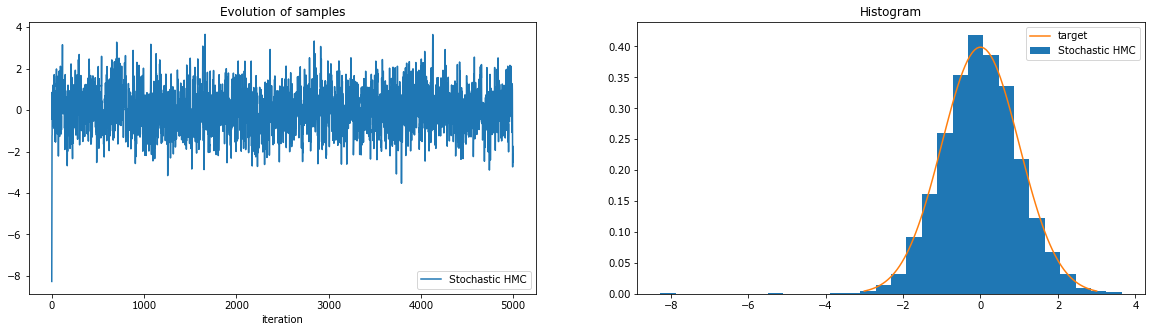

In [12]:
#Plotting results

fig,ax=plt.subplots(1,2,figsize=(20,5))
#ax[0].plot(HMC_sampler.trace,label='HMC')
#ax[1].hist(HMC_sampler.trace,label='HMC',bins=20)

ax[0].plot(Stochastic_HMC_sampler.trace,label='Stochastic HMC')
ax[1].hist(Stochastic_HMC_sampler.trace,label='Stochastic HMC',bins=30, density=True)

#add true density
x=np.linspace(-3,3,100)
ax[1].plot(x, sp.stats.norm.pdf(x), label='target')

ax[0].legend();
ax[1].legend();

ax[0].set_xlabel('iteration')
ax[0].set_title('Evolution of samples')
ax[1].set_title('Histogram')
plt.show()

Starting at -10, the algorithm finds the center and seems to be sampling accurately.

    B) Different coefficients of B and C
    
Let's observe the performances of SGHMC in the same conditions but with different values of $V$ and $C$. Let's start this time from 0.

In [33]:
l_V = [0.05, 0.1, 0.5, 1, 5]
l_C = [0.1, 0.5, 1, 5, 10]

In [36]:
#parameters
#initialize the position vector for HMC sampling with the weights of the trained neural network
position_init = np.array(np.array([[0]],dtype='float64'))
#leap-frog step size
step_size = lambda t : 0.1
#leap-frog steps
leapfrog_steps = 10
#number of total samples before burn-in
total_samples = 2000

s=[] #list of samples


for i in range(5):
    s_i=[]
    for j in range(i,5):
        print(i,j)
        position_init = np.array(np.array([[0]],dtype='float64'))
        #Sampling
        SGHMC_sampler=SGHMC_1(potential_energy, kinetic_energy, kinetic_energy_distribution,l_V[i],l_C[j], random=None, diagnostic_mode=False)
        SGHMC_sampler.sample(position_init=position_init, step_size=step_size, leapfrog_steps=leapfrog_steps,total_samples=total_samples, burn_in=0, thinning_factor=0, check_point=200)
        s_i+=[SGHMC_sampler.trace]
    s+=[s_i]


0 0
SGHMC 200
SGHMC 400
SGHMC 600
SGHMC 800
SGHMC 1000
SGHMC 1200
SGHMC 1400
SGHMC 1600
SGHMC 1800
0 1
SGHMC 200
SGHMC 400
SGHMC 600
SGHMC 800
SGHMC 1000
SGHMC 1200
SGHMC 1400
SGHMC 1600
SGHMC 1800
0 2
SGHMC 200
SGHMC 400
SGHMC 600
SGHMC 800
SGHMC 1000
SGHMC 1200
SGHMC 1400
SGHMC 1600
SGHMC 1800
0 3
SGHMC 200
SGHMC 400
SGHMC 600
SGHMC 800
SGHMC 1000
SGHMC 1200
SGHMC 1400
SGHMC 1600
SGHMC 1800
0 4
SGHMC 200
SGHMC 400
SGHMC 600
SGHMC 800
SGHMC 1000
SGHMC 1200
SGHMC 1400
SGHMC 1600
SGHMC 1800
1 1
SGHMC 200
SGHMC 400
SGHMC 600
SGHMC 800
SGHMC 1000
SGHMC 1200
SGHMC 1400
SGHMC 1600
SGHMC 1800
1 2
SGHMC 200
SGHMC 400
SGHMC 600
SGHMC 800
SGHMC 1000
SGHMC 1200
SGHMC 1400
SGHMC 1600
SGHMC 1800
1 3
SGHMC 200
SGHMC 400
SGHMC 600
SGHMC 800
SGHMC 1000
SGHMC 1200
SGHMC 1400
SGHMC 1600
SGHMC 1800
1 4
SGHMC 200
SGHMC 400
SGHMC 600
SGHMC 800
SGHMC 1000
SGHMC 1200
SGHMC 1400
SGHMC 1600
SGHMC 1800
2 2
SGHMC 200
SGHMC 400
SGHMC 600
SGHMC 800
SGHMC 1000
SGHMC 1200
SGHMC 1400
SGHMC 1600
SGHMC 1800
2 3
SGHMC 

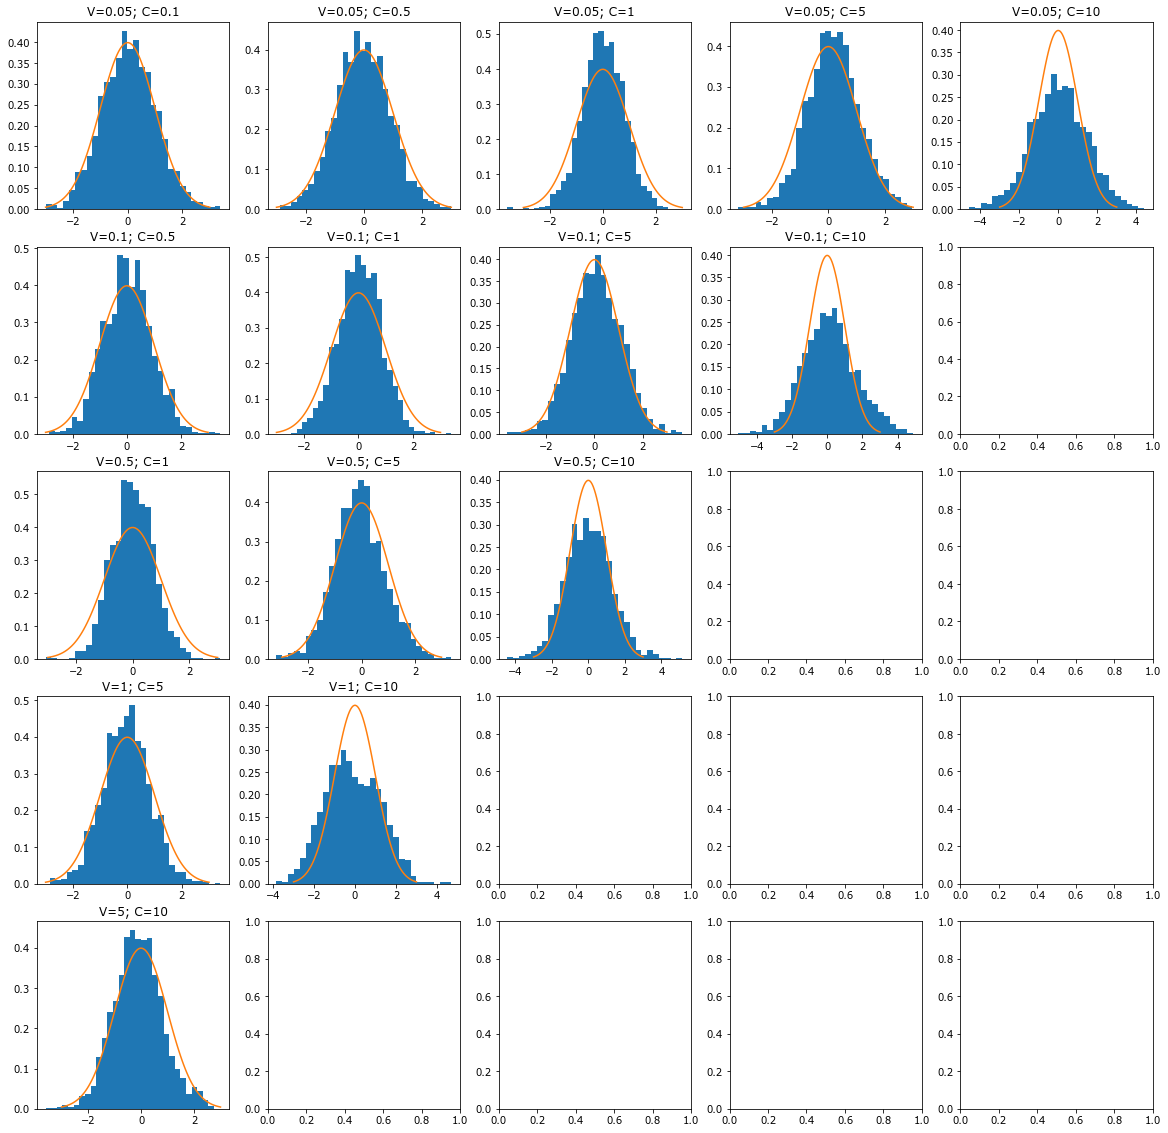

In [44]:
#Histogram of samples for various values of V and C

fig, ax = plt.subplots(5,5,figsize=(20,20))

for i in range(5):
    for j in range(0,5-i):
        ax[i,j].hist(s[i][j],label='Stochastic HMC',bins=30, density=True)
        ax[i,j].plot(x, sp.stats.norm.pdf(x), label='target')
        ax[i,j].set_title('V=' + str(l_B[i]) + '; C=' + str(l_C[i+j]))
        
    

The plots above show that when the $C$ is high compare to the variance $V$, the sampling is not accurate. Indeed the noise term added to the formula has much higher variance than just the distribution to sample from. The plot below shows the same conclusion with a much extreme value of $C$.

SGHMC 200
SGHMC 400
SGHMC 600
SGHMC 800
SGHMC 1000
SGHMC 1200
SGHMC 1400
SGHMC 1600
SGHMC 1800
SGHMC 2000
SGHMC 2200
SGHMC 2400
SGHMC 2600
SGHMC 2800
SGHMC 3000
SGHMC 3200
SGHMC 3400
SGHMC 3600
SGHMC 3800
SGHMC 4000
SGHMC 4200
SGHMC 4400
SGHMC 4600
SGHMC 4800


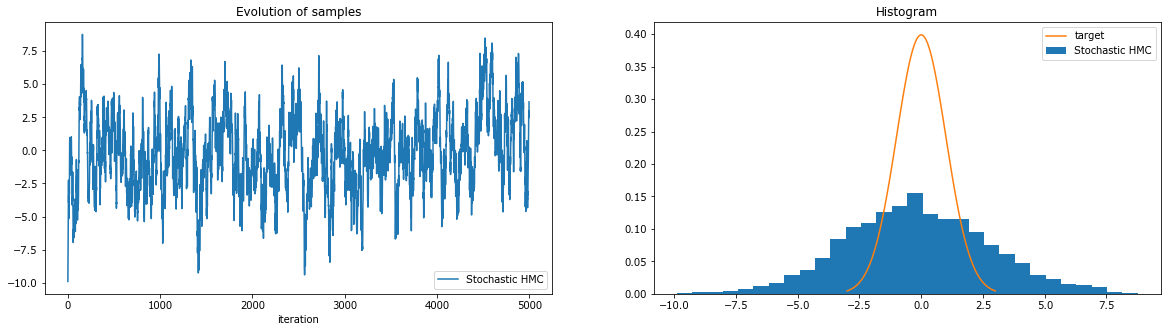

In [43]:
#parameters

#initialize the position vector for HMC sampling with the weights of the trained neural network
position_init = np.array(np.array([[-10]],dtype='float64'))
#leap-frog step size
step_size = lambda t : 0.1
#leap-frog steps
leapfrog_steps = 10
#number of total samples before burn-in
total_samples = 5000

B=1
C=np.matrix([20]) #=> >B

#Sampling
Stochastic_HMC_sampler=SGHMC_1(potential_energy, kinetic_energy, kinetic_energy_distribution,B,C, random=None, diagnostic_mode=False)
Stochastic_HMC_sampler.sample(position_init=position_init, step_size=step_size, leapfrog_steps=leapfrog_steps,total_samples=total_samples, burn_in=0, thinning_factor=0, check_point=200)


#Plotting results

fig,ax=plt.subplots(1,2,figsize=(20,5))
#ax[0].plot(HMC_sampler.trace,label='HMC')
#ax[1].hist(HMC_sampler.trace,label='HMC',bins=20)

ax[0].plot(Stochastic_HMC_sampler.trace,label='Stochastic HMC')
ax[1].hist(Stochastic_HMC_sampler.trace,label='Stochastic HMC',bins=30, density=True)

#add true density
x=np.linspace(-3,3,100)
ax[1].plot(x, sp.stats.norm.pdf(x), label='target')

ax[0].legend();
ax[1].legend();

ax[0].set_xlabel('iteration')
ax[0].set_title('Evolution of samples')
ax[1].set_title('Histogram')
plt.show()

Therefore this algorithm cannot be use as a black box. The variance $C$ needs to be chosen carefully. If the latter is too big compare to $V$, maybe the learning rate needs to be shrunk to counter the effects of $C$. If the variance $V$ varies a lot depending on the value of the parameter $\theta$ to sample, it can be very difficult to choose a good compromise of both the learning rate and the friction term $C$. We neither want to have samples too close after each iteration nor having wrong samples i.e. too far from the mass centers of the distribution. 

**References:** 
- [1] SGHMC: https://arxiv.org/pdf/1402.4102.pdf
- [2] SGLD: https://en.wikipedia.org/wiki/Stochastic_gradient_Langevin_dynamics
- [3] Independant evaluation of SGLD: https://arxiv.org/abs/1811.10072